In [13]:
import numpy as np

In [14]:
def auction_eval(price_format, auction_format, bidder_info, bid_history=[], current_bid=0.0, bid_increment=0.0):
    if auction_format == "SB":
        list_bidder = []
        list_bids = []

        for bidder in bidder_info:
            list_bidder.append(bidder['BidderName'])
            list_bids.append(bidder['BidFunction'](current_bid, bid_history))

        bid_history.append({"Round": 1, "Value": None, "Bids": list_bids})

        max_bid = max(list_bids)
        winners = [list_bidder[i] for i in range(len(list_bidder)) if list_bids[i] == max_bid]

        winner = np.random.choice(winners)
        pay = sorted(list_bids, reverse=True)[price_format-1]

    elif auction_format == "OO":
        list_bidder = []
        list_bids = []

        for bidder in bidder_info:
            list_bidder.append(bidder['BidderName'])
            list_bids.append(bidder['BidFunction'](current_bid, bid_history))

        bid_history.append({"Round": len(bid_history)+1, "Value": current_bid, "Bids": list_bids})

        if sum(list_bids) == 1: # If there is a winner this round
            max_index = list_bids.index(1)
            winner = list_bidder[max_index]
            pay = bid_history[-price_format]['Value']

        elif sum(list_bids) == 0: # if everyone quits

            if len(bid_history) == 1: # if everyone quits at first round
                winner = None
                pay = None
            else: # find the winner from previous round
                list_previous_bids = bid_history[-2]['Bids']
                winners = [list_bidder[i] for i in range(len(list_bidder)) if list_previous_bids[i] == 1]
                winner = np.random.choice(winners)

                # check if there is enough history to go back to.
                if len(bid_history) < price_format:
                    pay = bid_history[0]['Value']
                else:
                    pay = bid_history[-max(price_format, 2)]['Value']

        else: # If there is more than one person bidding
            sum(list_bids) > 1
            winner, pay = auction_eval(price_format, auction_format, bidder_info,
                                       bid_history, current_bid+bid_increment, bid_increment)

    else:
        print "Invalid Auction Format"
        winner = None
        pay = None

    return winner, pay

### Case (a)

In [15]:
BidF = []
for i in np.arange(0, 1, 0.1):
    f = lambda currentBid, bidHist, bid_value=i: bid_value
    BidF.append(f)

BI = [{"BidderName": "Bidder %d" % (i+1), "BidFunction": BidF[i]} for i in range(10)]

winner, pay = auction_eval(2, "SB", BI)

print "Sealed Bid, 2nd price, Winner:", winner, "Pay:", pay

Sealed Bid, 2nd price, Winner: Bidder 10 Pay: 0.8


### Case (b)

In [16]:
BidF = []
for i in np.arange(0, 1, 0.1):
    f = lambda currentBid, bidHist, bid_value=i: 9.0*bid_value/10.0
    BidF.append(f)

BI = [{"BidderName": "Bidder %d" % (i+1), "BidFunction": BidF[i]} for i in range(10)]

winner, pay = auction_eval(1, "SB", BI)

print "Sealed Bid, 1st price, Winner:", winner, "Pay:", pay

Sealed Bid, 1st price, Winner: Bidder 10 Pay: 0.81


### Case (c)

In [17]:
BidF = []
for i in np.arange(0, 1, 0.1):
    f = lambda currentBid, bidHist, value=i: int(value>currentBid)
    BidF.append(f)

BI = [{"BidderName": "Bidder %d" % (i+1), "BidFunction": BidF[i]} for i in range(10)]

bid_history = []
winner, pay = auction_eval(2, "OO", BI, bid_history, current_bid=0, bid_increment=0.05)

print "Open Outcry, 2nd price, Winner:", winner, "Pay:", pay, "Round", len(bid_history)
for i in bid_history:
    print i

Open Outcry, 2nd price, Winner: Bidder 10 Pay: 0.75 Round 17
{'Bids': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'Round': 1, 'Value': 0}
{'Bids': [0, 1, 1, 1, 1, 1, 1, 1, 1, 1], 'Round': 2, 'Value': 0.05}
{'Bids': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'Round': 3, 'Value': 0.1}
{'Bids': [0, 0, 1, 1, 1, 1, 1, 1, 1, 1], 'Round': 4, 'Value': 0.15000000000000002}
{'Bids': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'Round': 5, 'Value': 0.2}
{'Bids': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'Round': 6, 'Value': 0.25}
{'Bids': [0, 0, 0, 1, 1, 1, 1, 1, 1, 1], 'Round': 7, 'Value': 0.3}
{'Bids': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'Round': 8, 'Value': 0.35}
{'Bids': [0, 0, 0, 0, 1, 1, 1, 1, 1, 1], 'Round': 9, 'Value': 0.39999999999999997}
{'Bids': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 'Round': 10, 'Value': 0.44999999999999996}
{'Bids': [0, 0, 0, 0, 0, 1, 1, 1, 1, 1], 'Round': 11, 'Value': 0.49999999999999994}
{'Bids': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1], 'Round': 12, 'Value': 0.5499999999999999}
{'Bids': [0, 0, 0, 0, 0, 0, 1, 1, 1, 1], 'Round': 13

## Part 2

### Part (a) 

In [422]:
def run_simulation(price_format, lambda_param, n_bidders, bidding_function = lambda x: x, n_sims = 100000):
    
    pays_list = []
    for i in range(n_sims):
            BidF = []
            for i in range(n_bidders):
                f = lambda currentBid, bidHist, value=np.random.exponential(scale = 1.0/lambda_param): bidding_function(value)
                BidF.append(f)

            BI = [{"BidderName": "Bidder %d" % (i+1), "BidFunction": BidF[i]} for i in range(n_bidders)]

            bid_history = []
            winner, pay = auction_eval(price_format, "SB", BI, bid_history, current_bid=0, bid_increment=0.01)
            pays_list.append(pay)
    
    print "Open Outcry, Price Format : %s, Lambda: %s, Number of Bidders: %s, Expected_Revenue: %s" % (price_format, lambda_param, n_bidders, np.mean(pays_list))
        
    
    
    

#### N_SIMS = 100,000

In [423]:
for lambda_param in [1,10]:
    for n_bidders in [2, 5, 10]:
        run_simulation(2, lambda_param, n_bidders)

Open Outcry, Price Format : 2, Lambda: 1, Number of Bidders: 2, Expected_Revenue: 0.500850602868
Open Outcry, Price Format : 2, Lambda: 1, Number of Bidders: 5, Expected_Revenue: 1.28285729143
Open Outcry, Price Format : 2, Lambda: 1, Number of Bidders: 10, Expected_Revenue: 1.92965998828
Open Outcry, Price Format : 2, Lambda: 10, Number of Bidders: 2, Expected_Revenue: 0.0500227374273
Open Outcry, Price Format : 2, Lambda: 10, Number of Bidders: 5, Expected_Revenue: 0.12815828871
Open Outcry, Price Format : 2, Lambda: 10, Number of Bidders: 10, Expected_Revenue: 0.19311500942


#### N_SIMS = 1000

In [424]:
for lambda_param in [1,10]:
    for n_bidders in [2, 5, 10]:
        run_simulation(2, lambda_param, n_bidders, n_sims = 1000)

Open Outcry, Price Format : 2, Lambda: 1, Number of Bidders: 2, Expected_Revenue: 0.501519201913
Open Outcry, Price Format : 2, Lambda: 1, Number of Bidders: 5, Expected_Revenue: 1.29180656987
Open Outcry, Price Format : 2, Lambda: 1, Number of Bidders: 10, Expected_Revenue: 1.88159129749
Open Outcry, Price Format : 2, Lambda: 10, Number of Bidders: 2, Expected_Revenue: 0.0501256965536
Open Outcry, Price Format : 2, Lambda: 10, Number of Bidders: 5, Expected_Revenue: 0.128950660059
Open Outcry, Price Format : 2, Lambda: 10, Number of Bidders: 10, Expected_Revenue: 0.191332214275


## Part (c)

## 2 bidders

In [425]:
def bid_function_two_bidders(value, lambda_param):
    return (1.0/lambda_param) - (value/(np.exp(lambda_param*value*1.0) - 1))

### 100, 000 simulations

In [426]:
for lambda_param in [1,10]:
    run_simulation(1, lambda_param, 2, bidding_function = lambda x: bid_function_two_bidders(x, lambda_param))

Open Outcry, Price Format : 1, Lambda: 1, Number of Bidders: 2, Expected_Revenue: 0.499212683399
Open Outcry, Price Format : 1, Lambda: 10, Number of Bidders: 2, Expected_Revenue: 0.0499471991679


### 10,000 simulations

In [427]:
for lambda_param in [1,10]:
    run_simulation(1, lambda_param, 2, bidding_function = lambda x: bid_function_two_bidders(x, lambda_param), n_sims = 1000)

Open Outcry, Price Format : 1, Lambda: 1, Number of Bidders: 2, Expected_Revenue: 0.504602844899
Open Outcry, Price Format : 1, Lambda: 10, Number of Bidders: 2, Expected_Revenue: 0.0516618381194


### 5 bidders

In [428]:
def bid_function_five_bidders(value, lambda_param):
    """
    (e^(4 λ v) (12 λ v - 25) + 16 e^(λ v) - 36 e^(2 λ v) + 48 e^(3 λ v) - 3)/(12 λ (e^(λ v) - 1)^4)
    """
    return value - (((np.exp(4 * lambda_param * value) * ((12 * lambda_param * value) - 25)) + 
                      (16 * np.exp(lambda_param * value)) - (36* np.exp(2 * lambda_param * value))
                     + (48 * np.exp(3 * lambda_param * value) - 3))
                    /((12 * lambda_param* ((np.exp(lambda_param * value) - 1))**4)))

### 1000 simulations

In [450]:
for lambda_param in [1,10]:
    run_simulation(1, lambda_param, 5, bidding_function = lambda x: bid_function_five_bidders(x, lambda_param), n_sims = 1000)

Open Outcry, Price Format : 1, Lambda: 1, Number of Bidders: 5, Expected_Revenue: 1.28063751602
Open Outcry, Price Format : 1, Lambda: 10, Number of Bidders: 5, Expected_Revenue: 0.133537930498


### 100 simulations

In [453]:
for lambda_param in [1,10]:
    run_simulation(1, lambda_param, 5, bidding_function = lambda x: bid_function_five_bidders(x, lambda_param), n_sims = 100)

Open Outcry, Price Format : 1, Lambda: 1, Number of Bidders: 5, Expected_Revenue: 1.25051987019
Open Outcry, Price Format : 1, Lambda: 10, Number of Bidders: 5, Expected_Revenue: 0.132006548946


### 10 bidders

In [454]:
def bid_function_ten_bidders(value, lambda_param):
    """
    (280 - 2835*E^(v*λ) + 12960*E^(2*v*λ) - 
   35280*E^(3*v*λ) + 63504*E^(4*v*λ) - 
   79380*E^(5*v*λ) + 70560*E^(6*v*λ) - 
   45360*E^(7*v*λ) + 22680*E^(8*v*λ) + 
   E^(9*v*λ)*(-7129 + 2520*v*λ))/
  (2520*(-1 + E^(v*λ))^9*λ)
    """
    
    return value - ((280 - 2835*np.exp(value * lambda_param) + 12960*np.exp(2*value * lambda_param) - 
   35280*np.exp(3*value * lambda_param) + 63504*np.exp(4*value * lambda_param) - 
   79380*np.exp(5*value * lambda_param) + 70560*np.exp(6*value * lambda_param) - 
   45360*np.exp(7*value * lambda_param) + 22680*np.exp(8*value * lambda_param) + 
   np.exp(9*value * lambda_param)*(-7129 + 2520*value * lambda_param))/
  (2520*(-1 + np.exp(value * lambda_param))**9*lambda_param))

### 1 simulation

In [470]:
for lambda_param in [1,10]:
    run_simulation(1, lambda_param, 10, bidding_function = lambda x: bid_function_ten_bidders(x, lambda_param), n_sims = 1)

Open Outcry, Price Format : 1, Lambda: 1, Number of Bidders: 10, Expected_Revenue: 1.63828592529
Open Outcry, Price Format : 1, Lambda: 10, Number of Bidders: 10, Expected_Revenue: 0.236923779012


### Functions to help in-class auction

In [64]:
def bid_function_first_price(n_bidders, values_function, function_param, values_range, step_size, trials = 10000):
    
    steps = np.arange(values_range[0], values_range[-1] + step_size, step_size)
    
    cdf =[]
    
    for val in steps:
        
        events = []
        for trial in range(trials):
            bids_sim = values_function(*(function_param + [n_bidders-1]))
            events.append(1 if val >= max(bids_sim) else 0)
            
        cdf.append(np.mean(events))
        
    integrals = np.cumsum(np.array(cdf)*step_size)    
    
    bid_function = steps - np.divide(integrals, np.array([0.0000001]+ cdf[1:]))

    return steps, cdf, bid_function

In [65]:
steps, cdf, bid_function = bid_function_first_price(5, np.random.exponential, [1.0/1], [0,5], 0.01)

/Users/shivakanththudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:18: RuntimeWarning: invalid value encountered in divide


In [23]:
def bid_function_two_bidders(value, lambda_param):
    return (1.0/lambda_param) - (value/(np.exp(lambda_param*value*1.0) - 1))
    

In [66]:
check_values = [bid_function_five_bidders(each, 1.0) for each in steps]

/Users/shivakanththudi/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:8: RuntimeWarning: invalid value encountered in double_scalars


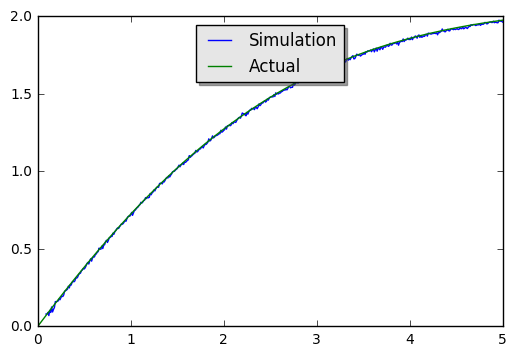

In [67]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots()

ax.plot(steps, bid_function, label='Simulation')
ax.plot(steps, check_values, label='Actual')

legend = ax.legend(loc='upper center', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
plt.show()